## Problem Statement:

There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.
The goal here is to predict the Price of an Old car based on the variables provided in the data set.


In [1]:
# loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Dowloading data

In [2]:
train = pd.read_csv(r"C:\Users\Rishima\Desktop\USED CARS\Training+Data+Set_N(1).csv")

In [3]:
test1 = pd.read_csv(r"C:\Users\Rishima\Desktop\USED CARS\Test+Data+Set(1).csv")

In [4]:
train = pd.concat([train, test1], axis=0, ignore_index=True)

C:\Users\Rishima\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [5]:
train.head()

,Age of car,Id,Location,Maker,Owner Type,Price,Vroom Audit Rating,body_type,distance,door_count,engine_displacement,engine_power,fuel_type,manufacture_year,model,seat_count,transmission
0,55,25001,Ahmedabad,skoda,Second,543764.25,8,compact,NaN,None,1964,147.0,petrol,1964,octavia,None,man
1,7,25002,Ahmedabad,fiat,Third,401819.25,6,NaN,27750.0,4,1242,51.0,petrol,2012,panda,4,man
2,5,25003,Hyderabad,bmw,Third,2392855.50,7,NaN,46000.0,4,1995,105.0,diesel,2014,x1,5,auto
3,8,25004,Mumbai,nissan,Third,958606.50,7,NaN,43949.0,4,1618,140.0,petrol,2011,juke,5,man
4,7,25005,Jaipur,bmw,Fourth & Above,3085561.50,7,NaN,59524.0,4,2993,180.0,diesel,2012,x5,5,auto


In [6]:
# replacing 'none' with null values
train['door_count'] = train['door_count'].replace('None', np.nan)
train['seat_count'] = train['seat_count'].replace('None', np.nan)

In [7]:
train['door_count'] = train['door_count'].astype('float')
train['seat_count'] = train['seat_count'].astype('float')

In [8]:
# checking for missing values
train.isnull().sum()

Age of car                 0
Id                         0
Location                   0
Maker                      0
Owner Type                 0
Price                   5615
Vroom Audit Rating         0
body_type              54572
distance                1339
door_count              8340
engine_displacement        0
engine_power            1607
fuel_type                  0
manufacture_year           0
model                      0
seat_count              9402
transmission               0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59130 entries, 0 to 59129
Data columns (total 17 columns):
Age of car             59130 non-null int64
Id                     59130 non-null int64
Location               59130 non-null object
Maker                  59130 non-null object
Owner Type             59130 non-null object
Price                  53515 non-null float64
Vroom Audit Rating     59130 non-null int64
body_type              4558 non-null object
distance               57791 non-null float64
door_count             50790 non-null float64
engine_displacement    59130 non-null int64
engine_power           57523 non-null float64
fuel_type              59130 non-null object
manufacture_year       59130 non-null int64
model                  59130 non-null object
seat_count             49728 non-null float64
transmission           59130 non-null object
dtypes: float64(5), int64(5), object(7)
memory usage: 7.7+ MB


In [10]:
train.describe()

,Age of car,Id,Price,Vroom Audit Rating,distance,door_count,engine_displacement,engine_power,manufacture_year,seat_count
count,59130.000000,59130.000000,5.351500e+04,59130.000000,5.779100e+04,50790.000000,59130.000000,57523.000000,59130.000000,49728.00000
mean,8.584340,48154.258245,1.098084e+06,5.998089,9.467385e+04,3.973518,1901.370184,100.356136,2010.415660,4.88598
std,4.658657,18439.690590,8.441565e+05,1.416501,2.788909e+05,0.739086,1487.932696,45.345649,4.658657,0.56360
min,3.000000,11001.000000,3.000000e+00,4.000000,0.000000e+00,1.000000,14.000000,10.000000,1934.000000,1.00000
25%,5.000000,34168.250000,5.051812e+05,5.000000,1.536000e+04,4.000000,1395.000000,73.000000,2008.000000,5.00000
50%,8.000000,48950.500000,8.854552e+05,6.000000,6.530000e+04,4.000000,1896.000000,91.000000,2011.000000,5.00000
75%,11.000000,63732.750000,1.477829e+06,7.000000,1.351120e+05,4.000000,1995.000000,125.000000,2014.000000,5.00000
max,85.000000,78515.000000,2.212078e+07,8.000000,9.899800e+06,6.000000,32000.000000,968.000000,2016.000000,9.00000


In [11]:
# filling missing values in seat count and by identifying pattern and filling with median values.
train["seat_count"] = train.groupby(["Maker", 'model', 'manufacture_year'])["seat_count"].transform(lambda x:x.fillna(x.median()))

In [12]:
# filling missing values in door count and by identifying pattern and filling with median values.
train["door_count"] = train.groupby(["Maker", 'model', 'manufacture_year'])["door_count"].transform(lambda x:x.fillna(x.median()))

In [13]:
# filling missing values in door_count with median
train['door_count'] = train['door_count'].fillna(4)

In [14]:
# filling missing values in seat_count with median
train['seat_count'] = train['seat_count'].fillna(4)

In [15]:
# filling missing values of distance with median
train['distance'] = train['distance'].fillna(train.distance.median())

In [16]:
train.isnull().sum()

Age of car                 0
Id                         0
Location                   0
Maker                      0
Owner Type                 0
Price                   5615
Vroom Audit Rating         0
body_type              54572
distance                   0
door_count                 0
engine_displacement        0
engine_power            1607
fuel_type                  0
manufacture_year           0
model                      0
seat_count                 0
transmission               0
dtype: int64

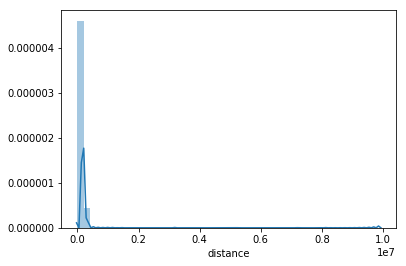

In [21]:
sns.distplot(train['distance'])

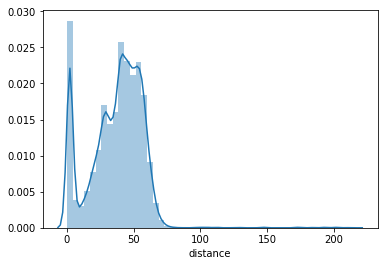

In [22]:
sns.distplot(np.cbrt(train['distance']))

In [23]:
# transforming distance to deal with outliers
train['distance'] = np.cbrt(train['distance'])

In [24]:
train['door_count'] = train['door_count'].astype('object')
train['seat_count'] = train['seat_count'].astype('object')

In [25]:
train.drop(['Id', 'manufacture_year', 'body_type'], axis=1, inplace=True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59130 entries, 0 to 59129
Data columns (total 14 columns):
Age of car             59130 non-null int64
Location               59130 non-null object
Maker                  59130 non-null object
Owner Type             59130 non-null object
Price                  53515 non-null float64
Vroom Audit Rating     59130 non-null int64
distance               59130 non-null float64
door_count             59130 non-null object
engine_displacement    59130 non-null int64
engine_power           57523 non-null float64
fuel_type              59130 non-null object
model                  59130 non-null object
seat_count             59130 non-null object
transmission           59130 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 6.3+ MB


### Finding anamolies in engine displacement and engine power and replacing it with mean by grouping by of maker and model

In [27]:
eng_indexes = train[train['engine_displacement'] > 5000].index

In [28]:
train.loc[eng_indexes,'engine_displacement'] = np.nan

In [29]:
end_indexes = train[train['engine_displacement'] < 800].index

In [30]:
train.loc[end_indexes,'engine_displacement'] = np.nan

In [31]:
train.isnull().sum()

Age of car                0
Location                  0
Maker                     0
Owner Type                0
Price                  5615
Vroom Audit Rating        0
distance                  0
door_count                0
engine_displacement     570
engine_power           1607
fuel_type                 0
model                     0
seat_count                0
transmission              0
dtype: int64

In [32]:
enh_indexes = train[train['engine_power'] < 70].index

In [33]:
train.loc[enh_indexes,'engine_power'] = np.nan

In [34]:
train["engine_displacement"] = train.groupby(["Maker", 'model'])["engine_displacement"].transform(lambda x:x.fillna(x.mean()))

In [35]:
train["engine_power"] = train.groupby(["Maker", 'model'])["engine_power"].transform(lambda x:x.fillna(x.mean()))

In [36]:
train.isnull().sum()

Age of car                0
Location                  0
Maker                     0
Owner Type                0
Price                  5615
Vroom Audit Rating        0
distance                  0
door_count                0
engine_displacement       0
engine_power           2853
fuel_type                 0
model                     0
seat_count                0
transmission              0
dtype: int64

In [37]:
train['engine_power'] = train['engine_power'].fillna(train['engine_power'].median())

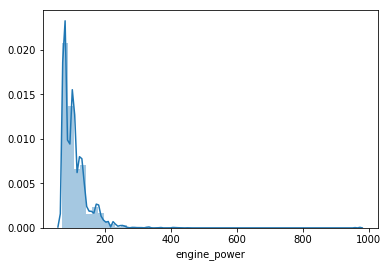

In [38]:
sns.distplot(train['engine_power'])

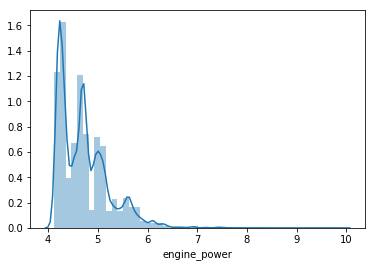

In [39]:
sns.distplot(np.cbrt(train['engine_power']))

In [40]:
train['engine_power'] = np.cbrt(train['engine_power'])

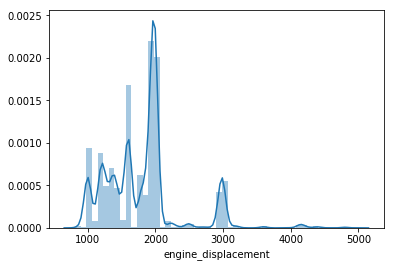

In [41]:
sns.distplot(train['engine_displacement'])

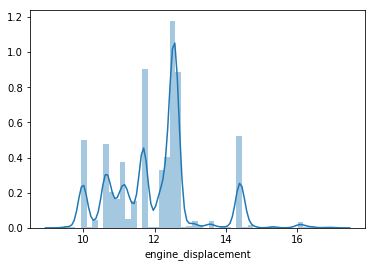

In [42]:
sns.distplot(np.cbrt(train['engine_displacement']))

In [43]:
train['engine_displacement'] = np.cbrt(train['engine_displacement'])

In [44]:
dummy_data = pd.get_dummies(train, drop_first=True)

In [45]:
dummy_data.shape

(59130, 63)

In [46]:
# splitting data into train and test
train1 = dummy_data[dummy_data['Price'].notnull()]
test = dummy_data[dummy_data['Price'].isnull()]

In [47]:
train1.shape

(53515, 63)

In [48]:
test.shape

(5615, 63)

In [49]:
test = test.drop('Price', axis=1)

In [50]:
test.shape

(5615, 62)

In [51]:
# removing outliers from price.
train1 = train1[~(train1['Price']<=10000)&(train1['Price']<6500000)]

In [52]:
x = train1.drop('Price', axis=1)
y = train1.Price

In [53]:
x.shape

(53461, 62)

In [54]:
y.shape

(53461,)

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = pd.DataFrame(sc.fit_transform(x), columns = x.columns)
scaled_test = pd.DataFrame(sc.transform(test), columns = test.columns)

C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Rishima\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf = RandomForestRegressor(random_state=42)

In [58]:
rf.fit(x, y)
pred_model = rf.predict(test)

C:\Users\Rishima\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [59]:
solution = pd.DataFrame({"Unique Id":test1.Id,
                        "Price":pred_model,
                        })

solution.to_csv("BaseRandomForest.csv", index = False) 

In [60]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [4, 6, 8, 10, 12]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf }

print(random_grid)
{'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


rf = RandomForestRegressor(random_state = 42)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 30 , cv = 6, verbose = 2, random_state=42, n_jobs = -1)

# Fit the random search model

rf_random.fit(x, y)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000], 'max_features': ['auto', 'sqrt', None], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [4, 6, 8, 10, 12], 'min_samples_leaf': [1, 2, 4]}
Fitting 6 folds for each of 30 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 28.1min


In [ ]:
random_cv.best_estimator_

In [ ]:
trees_grid = {'n_estimators': [800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300]}

model = RandomForestRegressor(min_samples_leaf = 2,
                              min_samples_split = 2,
                               max_features = None,
                                  random_state = 42)

# Grid Search Object using the trees range and the random forest model
Grid_search = GridSearchCV(estimator = model, param_grid=trees_grid, cv = 4, 
                           scoring = 'neg_mean_absolute_error', verbose = 1,
                            return_train_score = True)

In [ ]:
Grid_search.fit(x, y)

In [ ]:
# # Get the results into a dataframe
# results = pd.DataFrame(grid_search.cv_results_)

# # Plot the training and testing error vs number of trees

# plt.style.use('fivethirtyeight')
# plt.plot(results['param_n_estimators'], -1 * results['mean_test_score'], label = 'Testing Error')
# plt.plot(results['param_n_estimators'], -1 * results['mean_train_score'], label = 'Training Error')
# plt.xlabel('Number of Trees'); plt.ylabel('Mean Abosolute Error'); plt.legend();
# plt.title('Performance vs Number of Trees');

In [ ]:
# Select the best model
final_model = grid_search.best_estimator_
final_model

In [ ]:
final_model.fit(x, y)

In [ ]:
final_pred = final_model.predict(scaledtest)